# Pregunta 1: Reducción de Dimensionalidad para Clasificación

## a) Construcción y descripción del dataframe

In [1]:
import urllib
import pandas as pd

#train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
#test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
#train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

#train_df.head()
#test_df.tail()
print "· Train set:"
print train_df.info()
print "· Test set:"
print test_df.info()

· Train set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1 to 528
Data columns (total 11 columns):
y       528 non-null int64
x.1     528 non-null float64
x.2     528 non-null float64
x.3     528 non-null float64
x.4     528 non-null float64
x.5     528 non-null float64
x.6     528 non-null float64
x.7     528 non-null float64
x.8     528 non-null float64
x.9     528 non-null float64
x.10    528 non-null float64
dtypes: float64(10), int64(1)
memory usage: 49.5 KB
None
· Test set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 462
Data columns (total 11 columns):
y       462 non-null int64
x.1     462 non-null float64
x.2     462 non-null float64
x.3     462 non-null float64
x.4     462 non-null float64
x.5     462 non-null float64
x.6     462 non-null float64
x.7     462 non-null float64
x.8     462 non-null float64
x.9     462 non-null float64
x.10    462 non-null float64
dtypes: float64(10), int64(1)
memory usage: 43.3 KB
None


Cada registro del conjunto de datos representa un sonido fonético asociado a una vocal del inglés británico. Existen 11 vocales distintas para asociar cada registro, por lo que se tienen 11 clases. A su vez cada registro representa el sonido mediante 10 características.

Se tienen 528 registros para el cojunto de entrenamiento y 462 para el conjunto de prueba.

Se tienen 48 registros (palabras) por clase para el conjunto de entrenamiento y 42 para el conjunto de prueba.

## b) Construcción de matrices y normalización

In [2]:
from sklearn.preprocessing import StandardScaler

X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

Para facilitar el trabajo, se traspasan los datos a forma matricial y luego se realiza una normalización de los datos.

Lo anterior se realiza para evitar creaciones de modelos incorrectos. Resulta necesario normalizar los datos para arreglar las varianzas y de esta forma dejar los datos respecto a un mismo punto y unidad de medición.

## c) PCA: Reducción de dimensionalidad

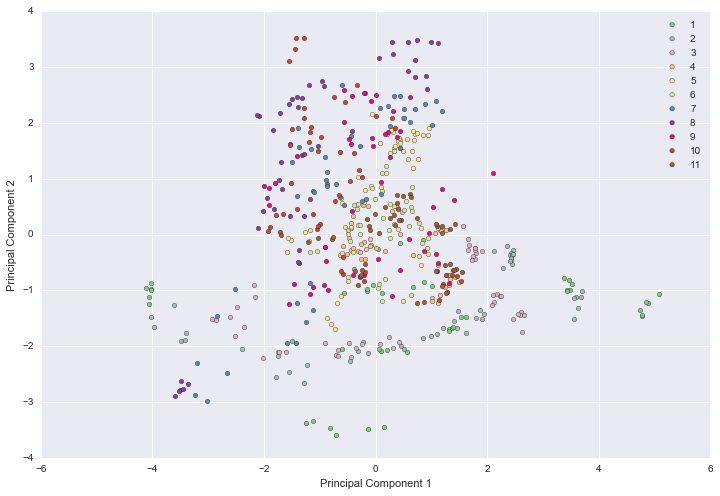

In [3]:
%matplotlib inline

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)

cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

La representación de los datos en dos dimensiones mediante PCA muestra una proyección de los registros sobre un plano donde se maximiza la varianza del conjunto de datos. Así, con los datos bien 'esparcidos', es posible detectar ciertas regiones donde una clase se acomoda mejor, como así también detectar outliners que incrementan el error del modelo.

PCA es un método no supervidaso al no tomar en consideración las etiquetas de cada registro al momento de reducir la dimensionalidad, lo cual muchas veces ocaciona que el resultado no sea satisfactorio para cierto tipo de problemas reales.

## d) LDA: Reducción de dimensionalidad

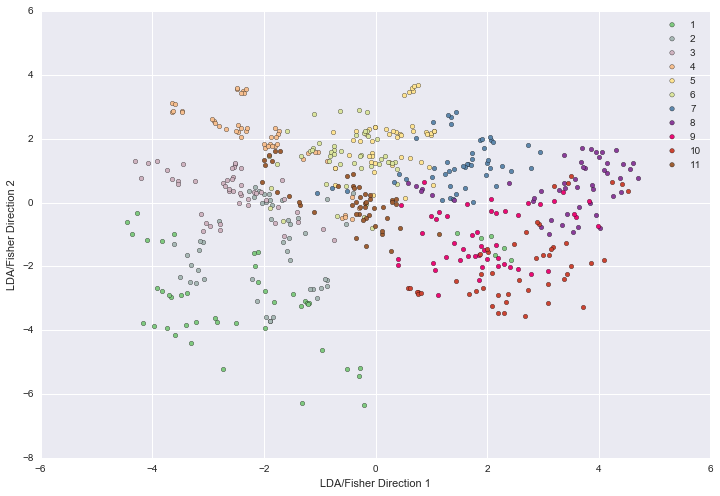

In [5]:
from sklearn.lda import LDA

sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)

cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
    
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Por otro lado, la reducción de dimensionalidad mediante LDA intenta maximizar la varianza entre clases, para así facilitar la visualización de regiones del plano donde se acomoda mejor una clase.

Esto se hace utilizando la información supervisada del conjunto de datos. Siendo LDA una técnica supervisada.

## e) Comparación de resultados anteriores: PCA y LDA

A partir de los gráficos anteriores queda claro que LDA presenta mejores resultados que PCA, ya que con LDA resulta más fácil distinguir ciertas regiones donde una clase se acumula de manera exclusiva.

Sin embargo, esta manera de distinguir entre un método u otro se obtiene divisando los gráficos. Por lo que se propone un metodo que intenta automatizar esta elección:

Se divide el gráfico en grillas tal como se muestran los gráficos actualmente, pero ajustando un tamaño de grilla conveniente. Luego identificando la clase predominante en cada grilla e indicando la densidad porcentual de dicha clase. Aquella técnica de redución de dimensionaliad que presente mejores indicadores porcentuales para cada grilla será la que acopla de mejor manera las clases en el plano, y por lo tanto será la mejor técnica para clasificación.

## f) Construcción de clasificador a-priori

In [6]:
import random

def a_priori_classifier(x):
    return random.choice(y)

# test:
l = []
n=100000
for i in range(n):
    l = l + [a_priori_classifier("test")]
    
import collections

counter=collections.Counter(l)

for i in counter:
    print counter[i]/float(n)

0.0906
0.09166
0.09005
0.08993
0.09099
0.09048
0.09044
0.09055
0.09238
0.09235
0.09057


Este clasificador a-priori elige una etiqueta aleatoria del conjunto de entrenamiento. De esta manera dependiendo de la cantidad de veces que aparece una clase respecto del resto, se retornará dicha clase con su probabilidad correspondiente.

Se sabe que la probabilidad de cada clase en el conjunto de entrenamiento es de $9,09\%$, por lo que se realiza una prueba para verificar el desempeño del modelo creado.

Se ejecuta el modelo $100.000$ veces y se calcula el porcentaje de aparición de cada clase. Para cada clase el porcentaje de aparición es similar el teórico.

## g) Clasificadores LDA, QDA y k-NN

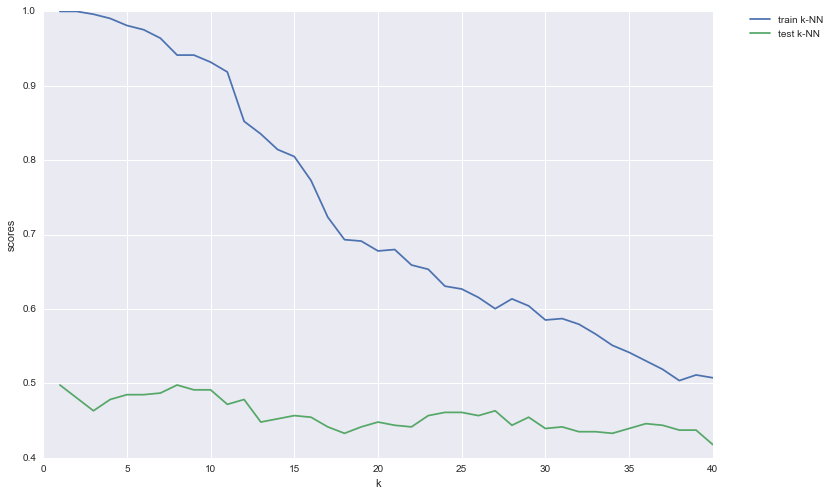

In [8]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values

X_std_test = StandardScaler().fit_transform(Xtest)

#LDA
lda_model = LDA()
lda_model.fit(X_std,y)

train_lda_score = lda_model.score(X_std,y)
test_lda_score = lda_model.score(X_std_test,ytest)

#QDA
qda_model = QDA()
qda_model.fit(X_std,y)

train_qda_score = qda_model.score(X_std,y)
test_qda_score = qda_model.score(X_std_test,ytest)

#k-NN
max_k = 41
train_knn_scores_list = []
test_knn_scores_list = []
for k in range(1,max_k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_std,y)

    train_knn_score = knn_model.score(X_std,y)
    test_knn_score = knn_model.score(X_std_test,ytest)

    train_knn_scores_list.append(train_knn_score)
    test_knn_scores_list.append(test_knn_score)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1,max_k), train_knn_scores_list, label="train k-NN")
plt.plot(range(1,max_k), test_knn_scores_list, label="test k-NN")
plt.ylabel('scores')
plt.xlabel('k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

Respecto al gráfico del último modelo, tanto para el conjunto de entrenamiento como para el de prueba, a medida que se consideran cada vez más vecinos para la clasificación, el puntaje del modelo disminuye. Este efecto es más drástico para el set de entrenamiento que el de prueba. Una explicación a este fenómeno puede ser que a medida que se consideran cada vez más vecinos, se está buscando cada vez en más espacio del dominio, y ya que los registros de una misma clase tienden a permanecer cerca el uno del otro dentro del espacio, es probable que con cada vecino adicional aumenten las posibilidades que corresponda a la clase erronea, y con ello clasificar de manera incorrecta.

Por otro lado, es posible notar que el parametro $k$ del modelo que maximiza el puntaje para el error de prueba se encuentra entre 1 y 10. Por lo tanto se imprimen dichos valores para encontrar el parametro correspondiente:

In [9]:
print zip(range(1,max_k),test_knn_scores_list)[:10]

[(1, 0.49783549783549785), (2, 0.48051948051948051), (3, 0.46320346320346323), (4, 0.47835497835497837), (5, 0.48484848484848486), (6, 0.48484848484848486), (7, 0.48701298701298701), (8, 0.49783549783549785), (9, 0.49134199134199136), (10, 0.49134199134199136)]


El mayor puntaje correspone a los valores de $k$ $1$ y $8$, con valor $0.49783549783549785$

In [10]:
from IPython.display import HTML, display

data = [['','Train','Test'],
        ['LDA',train_lda_score,test_lda_score],
        ['QDA',train_qda_score,test_qda_score],
        ['8-NN',train_knn_scores_list[7],test_knn_scores_list[7]]
       ]

display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
    ))

,Train,Test
LDA,0.683712121212,0.452380952381
QDA,0.988636363636,0.415584415584
8-NN,0.941287878788,0.497835497835


La tabla anterior muestra el comportamiento de los modelos para cada conjunto de datos.

Para Nearest Neighbors se utilizan 8 vecinos ya que es con ese valor que se comporta mejor el modelo para el conjunto de prueba.

Respecto a la presición del modelo para el conjunto de prueba, el que presenta mejores resultados es 8-NN con $49.78\%$. Por lo que, entre los 3, es el modelo que clasifica los datos.

Por otro lado, el conjunto de entrenamiento sobreajusta todos los modelos, ya que la presición es siempre mejor para este conjunto de datos. Este efecto se ve reflejado principalmente en el modelo QDA, donde se tiene la mejor presición para el conjunto de entrenamiento, y la peor presición para el conjunto de prueba a la vez.

## h) Clasificadores LDA, QDA y k-NN sobre data reducida mediante PCA

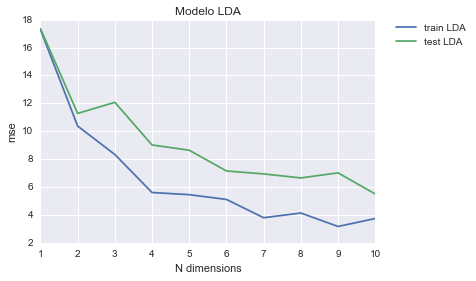

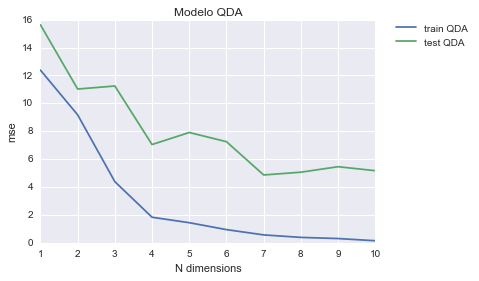

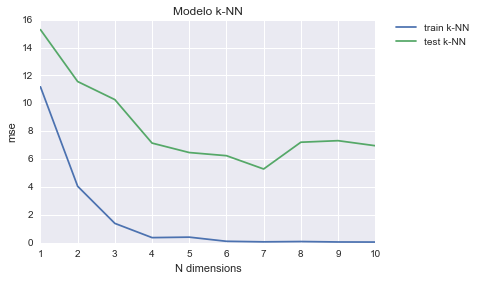

In [11]:
lda_mse_train_list = []
lda_mse_test_list = []
qda_mse_train_list = []
qda_mse_test_list = []
knn_mse_train_list = []
knn_mse_test_list = []
for d in range(1,11):
    sklearn_pca = PCA(n_components=d)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    Xred_pca_test = sklearn_pca.transform(X_std_test)
    
    #LDA
    lda_model = LDA()
    lda_model.fit(Xred_pca,y)
    
    lda_predictions_train = lda_model.predict(Xred_pca)
    lda_predictions_test = lda_model.predict(Xred_pca_test)
    
    lda_residuals_train = lda_predictions_train - y
    lda_residuals_test = lda_predictions_test - ytest
    
    lda_mse_train = np.mean(np.power(lda_residuals_train, 2))
    lda_mse_test = np.mean(np.power(lda_residuals_test, 2))
    
    lda_mse_train_list.append(lda_mse_train)
    lda_mse_test_list.append(lda_mse_test)
    
    #QDA
    qda_model = QDA()
    qda_model.fit(Xred_pca,y)
    
    qda_predictions_train = qda_model.predict(Xred_pca)
    qda_predictions_test = qda_model.predict(Xred_pca_test)
    
    qda_residuals_train = qda_predictions_train - y
    qda_residuals_test = qda_predictions_test - ytest
    
    qda_mse_train = np.mean(np.power(qda_residuals_train, 2))
    qda_mse_test = np.mean(np.power(qda_residuals_test, 2))
    
    qda_mse_train_list.append(qda_mse_train)
    qda_mse_test_list.append(qda_mse_test)
    
    #k-NN
    knn_model = KNeighborsClassifier()
    knn_model.fit(Xred_pca,y)
    
    knn_predictions_train = knn_model.predict(Xred_pca)
    knn_predictions_test = knn_model.predict(Xred_pca_test)
    
    knn_residuals_train = knn_predictions_train - y
    knn_residuals_test = knn_predictions_test - ytest
    
    knn_mse_train = np.mean(np.power(knn_residuals_train, 2))
    knn_mse_test = np.mean(np.power(knn_residuals_test, 2))

    knn_mse_train_list.append(knn_mse_train)
    knn_mse_test_list.append(knn_mse_test)

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), lda_mse_train_list, label="train LDA")
plt.plot(range(1,11), lda_mse_test_list, label="test LDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("Modelo LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), qda_mse_train_list, label="train QDA")
plt.plot(range(1,11), qda_mse_test_list, label="test QDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("Modelo QDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), knn_mse_train_list, label="train k-NN")
plt.plot(range(1,11), knn_mse_test_list, label="test k-NN")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("Modelo k-NN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

La función de error utilizada fue la de mínimos cuadrados.

De los gráficos obtenidos es posible notar que a medida que aumenta la dimensionalidad el error de entrenamiento se vuelve cada vez menor. Esto se debe principalmente a que a medida que se tiene un mayor número de características por registro, más sobreajustado será el modelo. Este efecto es una de las principales razones por las que uno elige reducir la dimensionalidad de los datos. Independiente de la dimensionalidad, los modelos están siempre sobreajustados.

La curva del error de prueba respecto al número de dimensiones se comporta diferente al de entrenamiento. Si bien este también tiende a disminuir, existen fluctuaciones en ciertos rangos del eje X. Lo que ocasiona que para los modelos QDA y k-NN la cantidad óptima de dimensiones a considerar es de 7. No así para LDA donde el modelo se comporta mejor con todas las dimensiones del conjunto original.

La técnica de reducción de dimensionalidad arroja que el mejor modelo es QDA, donde el error es cercano a 5.

## i) Clasificadores LDA, QDA y k-NN sobre data reducida mediante LDA

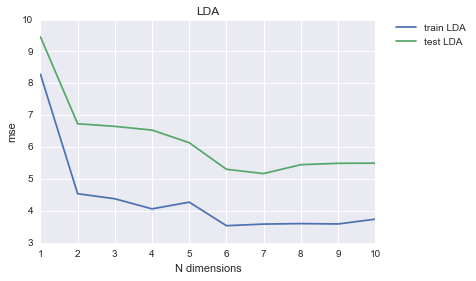

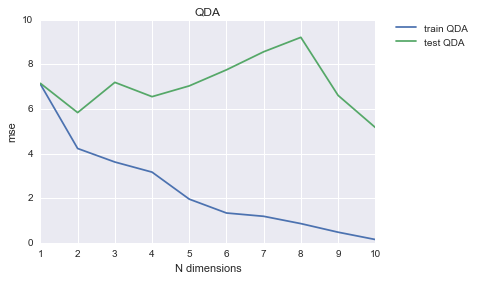

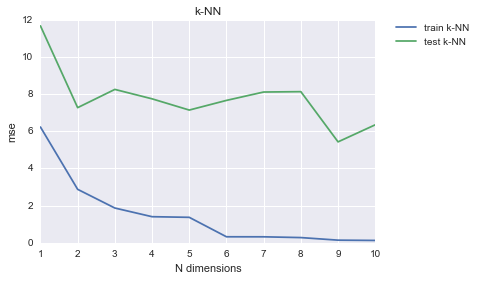

In [12]:
lda_mse_train_list = []
lda_mse_test_list = []
qda_mse_train_list = []
qda_mse_test_list = []
knn_mse_train_list = []
knn_mse_test_list = []
for d in range(1,11):
    sklearn_lda = LDA(n_components=d)
    Xred_lda = sklearn_lda.fit_transform(X_std, y)
    Xred_lda_test = sklearn_lda.transform(X_std_test)
    
    #LDA
    lda_model = LDA()
    lda_model.fit(Xred_lda,y)
    
    lda_predictions_train = lda_model.predict(Xred_lda)
    lda_predictions_test = lda_model.predict(Xred_lda_test)
    
    lda_residuals_train = lda_predictions_train - y
    lda_residuals_test = lda_predictions_test - ytest
    
    lda_mse_train = np.mean(np.power(lda_residuals_train, 2))
    lda_mse_test = np.mean(np.power(lda_residuals_test, 2))
    
    lda_mse_train_list.append(lda_mse_train)
    lda_mse_test_list.append(lda_mse_test)
    
    #QDA
    qda_model = QDA()
    qda_model.fit(Xred_lda,y)
    
    qda_predictions_train = qda_model.predict(Xred_lda)
    qda_predictions_test = qda_model.predict(Xred_lda_test)
    
    qda_residuals_train = qda_predictions_train - y
    qda_residuals_test = qda_predictions_test - ytest
    
    qda_mse_train = np.mean(np.power(qda_residuals_train, 2))
    qda_mse_test = np.mean(np.power(qda_residuals_test, 2))
    
    qda_mse_train_list.append(qda_mse_train)
    qda_mse_test_list.append(qda_mse_test)
    
    #k-NN
    knn_model = KNeighborsClassifier()
    knn_model.fit(Xred_lda,y)
    
    knn_predictions_train = knn_model.predict(Xred_lda)
    knn_predictions_test = knn_model.predict(Xred_lda_test)
    
    knn_residuals_train = knn_predictions_train - y
    knn_residuals_test = knn_predictions_test - ytest
    
    knn_mse_train = np.mean(np.power(knn_residuals_train, 2))
    knn_mse_test = np.mean(np.power(knn_residuals_test, 2))

    knn_mse_train_list.append(knn_mse_train)
    knn_mse_test_list.append(knn_mse_test)

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), lda_mse_train_list, label="train LDA")
plt.plot(range(1,11), lda_mse_test_list, label="test LDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), qda_mse_train_list, label="train QDA")
plt.plot(range(1,11), qda_mse_test_list, label="test QDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("QDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), knn_mse_train_list, label="train k-NN")
plt.plot(range(1,11), knn_mse_test_list, label="test k-NN")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("k-NN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Al reducir dimensionalidad con LDA se puede apreciar que los errores son menores que al utilizar PCA. Lo cual complementa el análisis anterior en la primera parte de este trabajo.

De la misma forma que anterior, los modelos tienen a tener un menor error al considerar más dimensiones. En algunos rangos se puede apreciar como el sobreajuste aumenta con el aumento de las dimensiones (QDA de 4 a 8 dimensiones, k-NN de 5 a 8 dimensiones).

Los gráficos muestran que los modelos que mejor se comportan son el LDA y QDA, donde el error es cercano a 5. Sin embargo, debido al sobreajuste presente en QDA y a su error de prueba, se puede decir que es LDA el que mejor se comporta y con una dimensionalidad ideal de 7.